In [40]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data from Github

In [41]:
def str_to_float(s):
    try:
        # Parse strings with decimal (,) separators
        return float(s.replace(',','.')) if type(s) == str else s
    except ValueError:
        return None

def str_to_date(s):
    try:
        # Parse dates
        return datetime.strptime(s,'%Y-%m-%d') if type(s) == str else s
    except ValueError:
        return None

In [42]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

covid_data_df = pd.read_csv(
    url,
    converters={'total_deaths_per_million': str_to_float,
                'date': str_to_date
               },
    low_memory=False
)

## Select countries

In [43]:
# iterating the columns 
for col in covid_data_df.columns: 
    print(col)

iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
new_vaccinations_smoothed_per_million
stringency_index
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_pover

In [44]:
countries = [
'Finland',
'France',
'Portugal',
'Spain',
'Sweden',
'United Kingdom',
'Israel'
]

covid_data_df = covid_data_df[covid_data_df['location'].isin(countries)]

In [45]:
def plot_serie(column_name, data_frame):
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.rcParams['figure.dpi'] = 200

    # fig = plt.figure()
    # fig.suptitle('Death per million', fontsize=15)

    for key, grp in data_frame.groupby(['location']): 
        plt.plot(grp['date'], grp[column_name], label = key)

    plt.ylabel(column_name, fontsize=18)
    plt.xlabel('Date', fontsize=16)
    plt.legend(loc="upper left")
    plt.show()

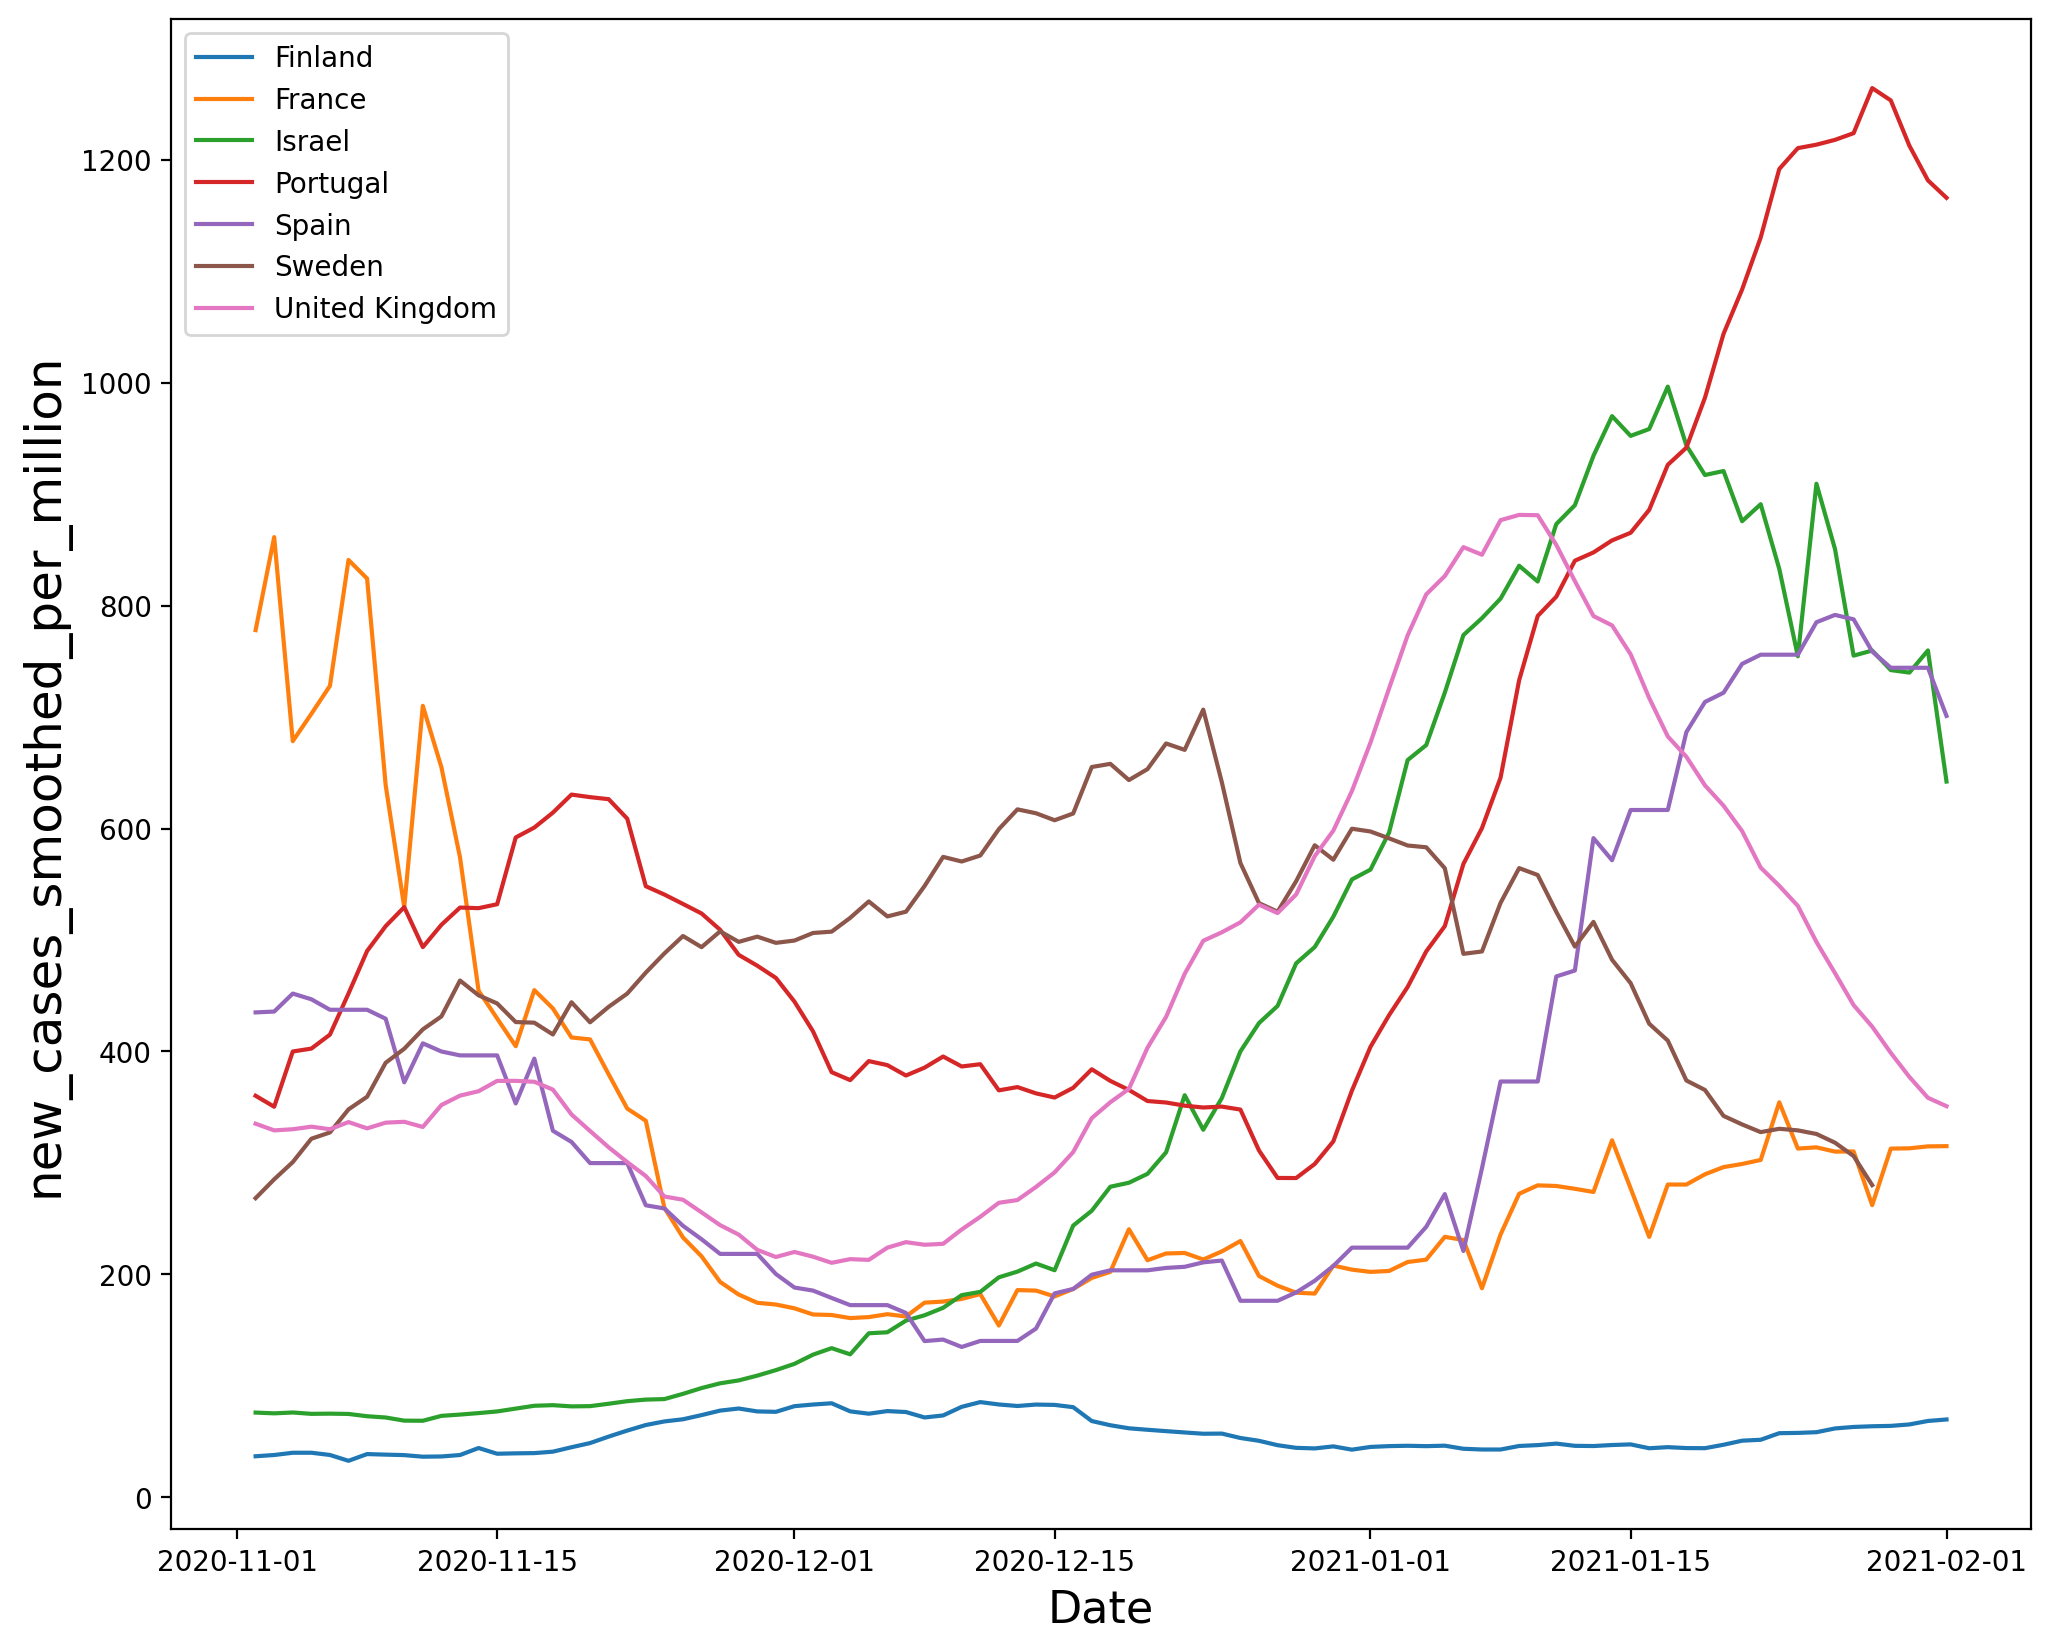

In [46]:
column_name = 'new_cases_smoothed_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > '2020-11-01')]
plot_serie(column_name, data_frame)

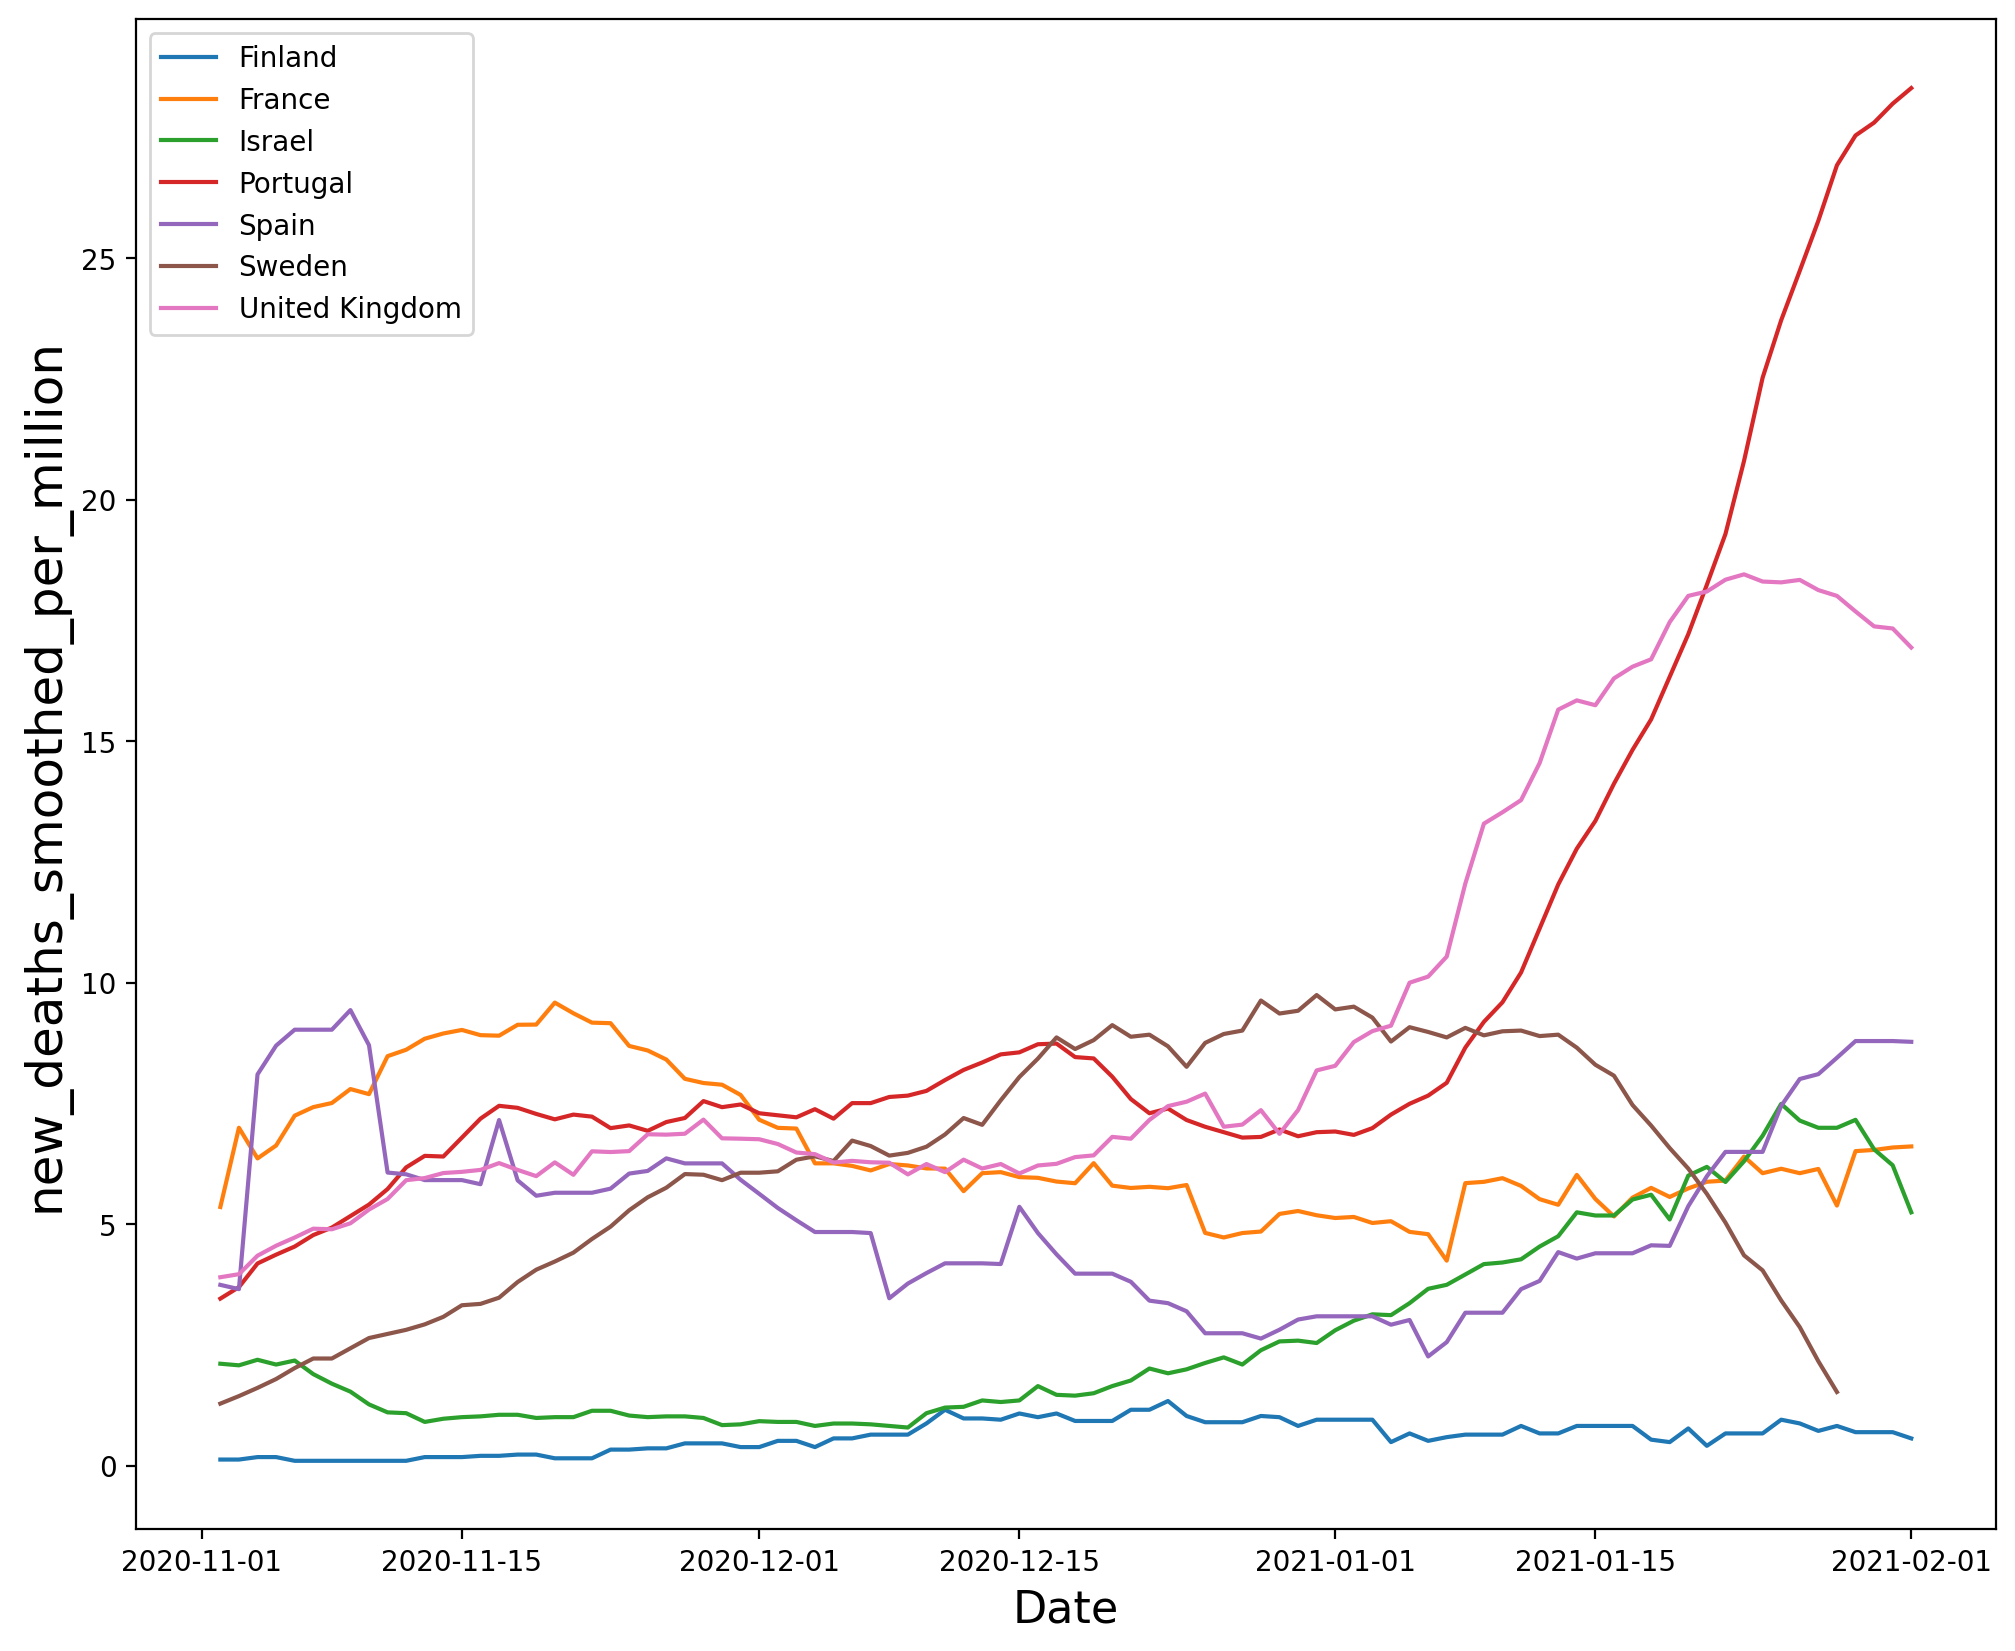

In [47]:
column_name = 'new_deaths_smoothed_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > '2020-11-01')]
plot_serie(column_name, data_frame)

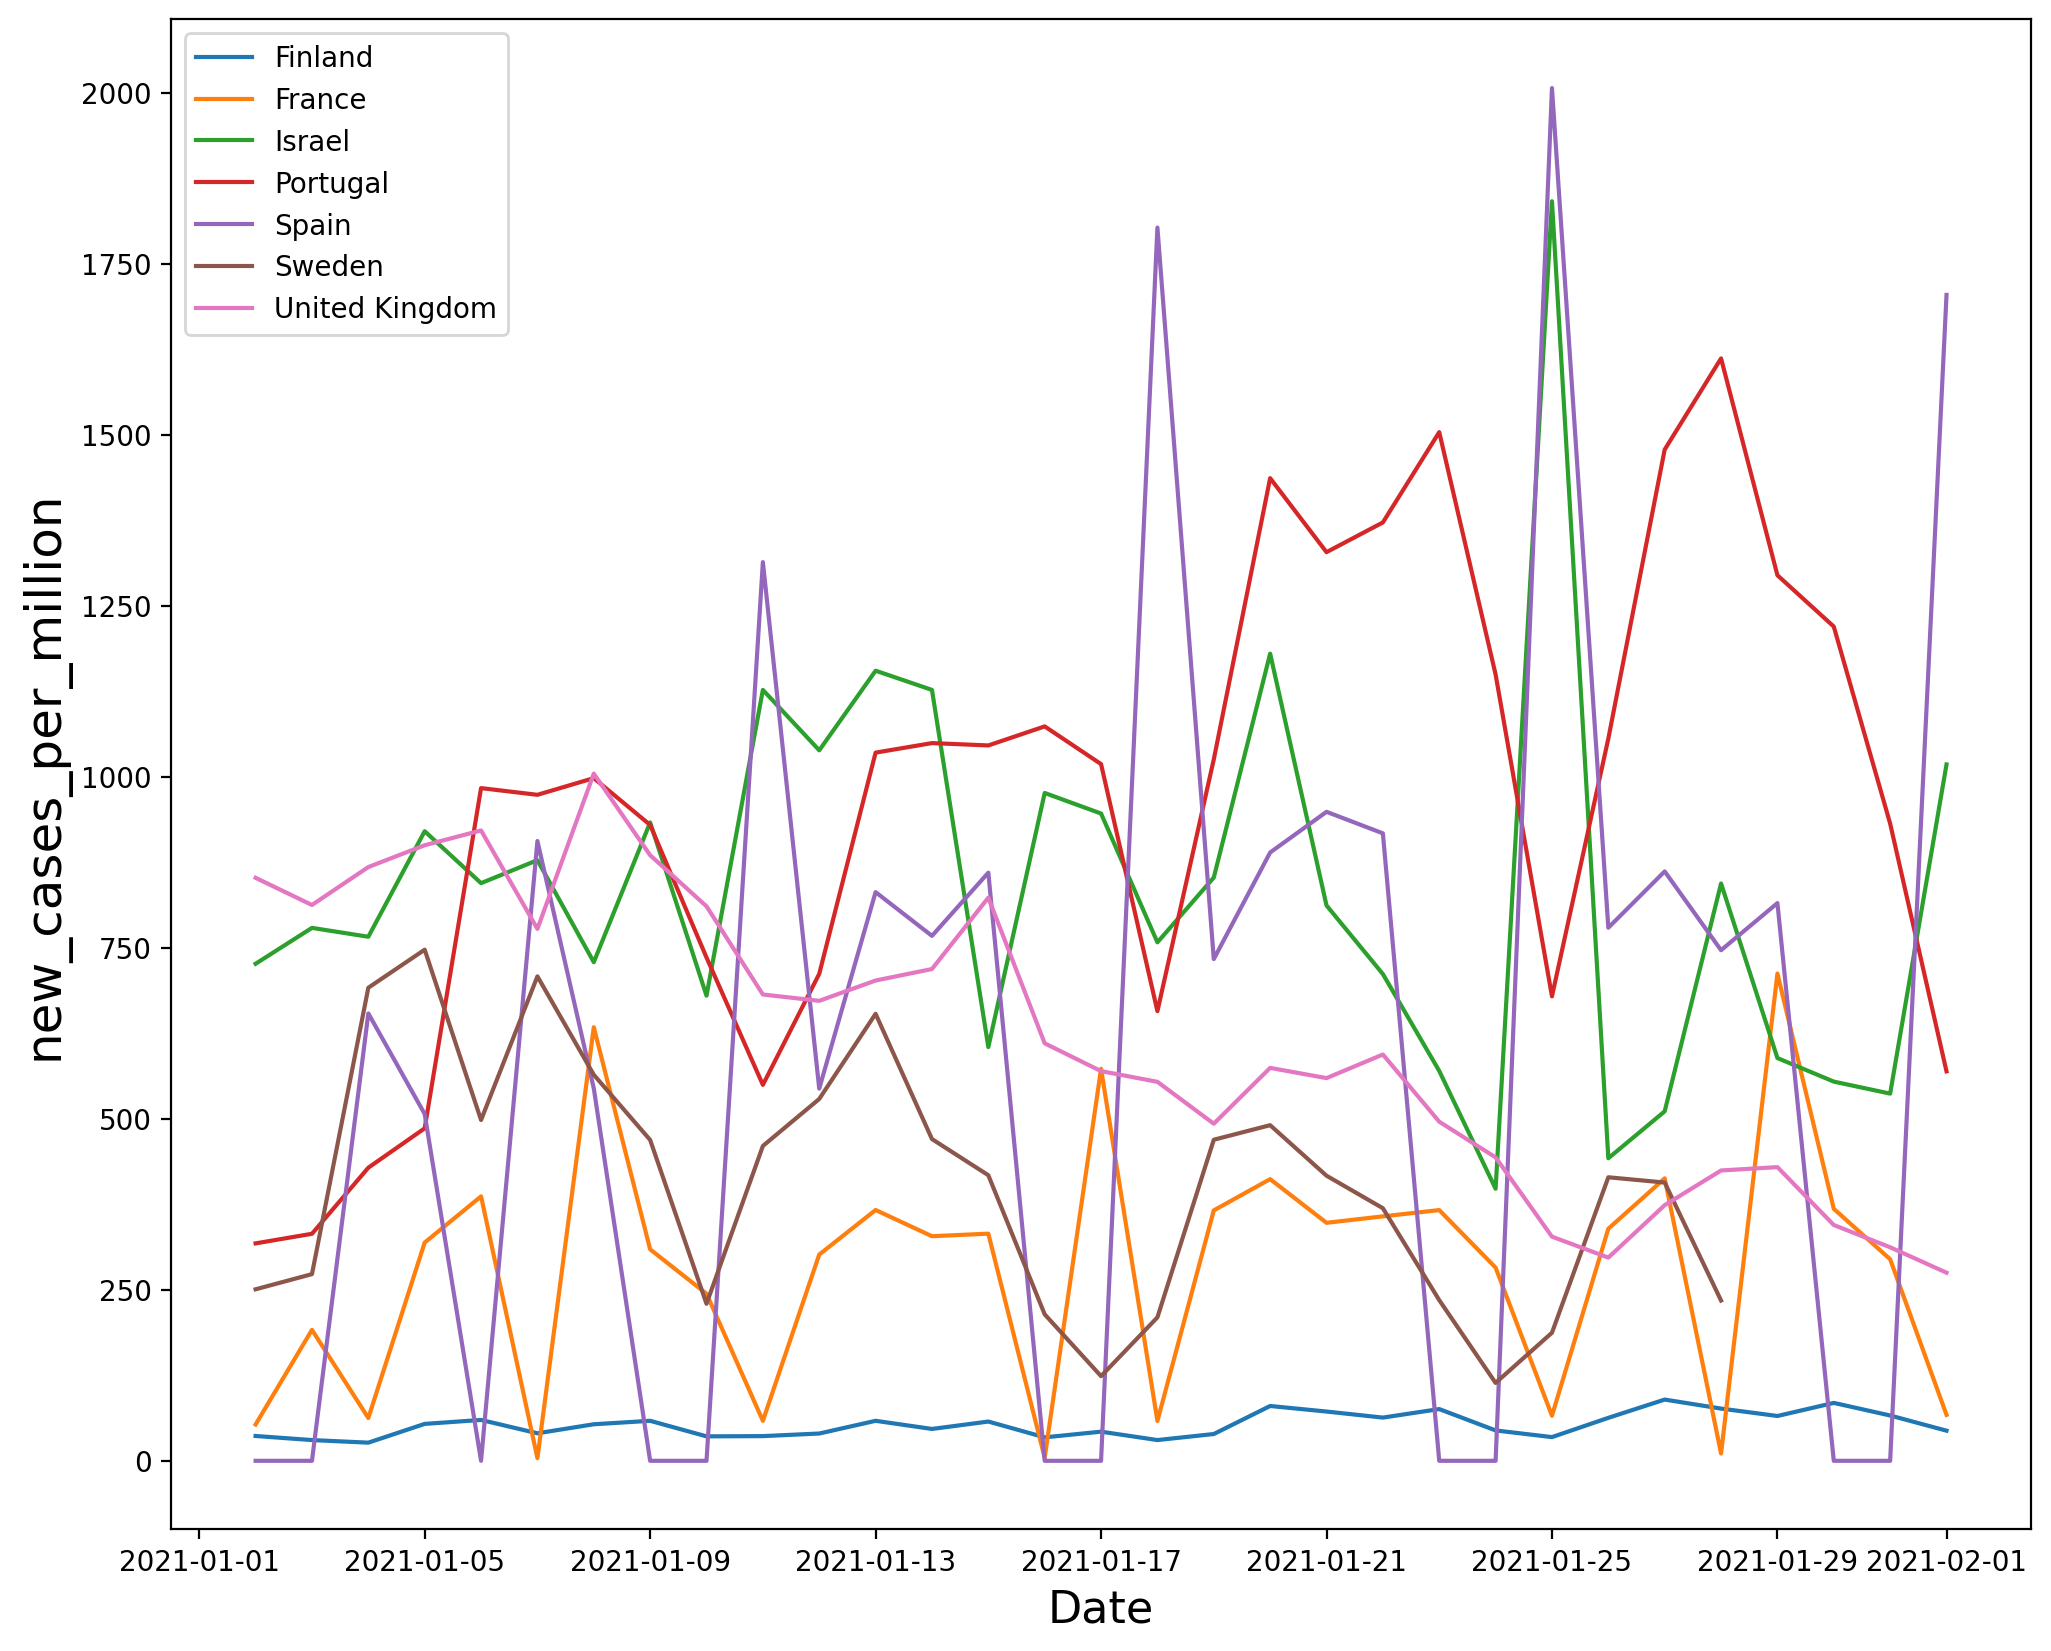

In [48]:
column_name = 'new_cases_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > '2021-01-01')]
plot_serie(column_name, data_frame)

In [49]:
covid_data_df_sorted = data_frame.sort_values(by='date', ascending=False).head(10)
covid_data_df_sorted

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
60111,GBR,Europe,United Kingdom,2021-02-01,3846851.0,18668.0,23821.429,106774.0,407.0,1150.143,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
20557,FRA,Europe,France,2021-02-01,3260308.0,4388.0,20564.714,76657.0,456.0,431.571,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
53623,ESP,Europe,Spain,2021-02-01,2822805.0,79686.0,32774.714,59081.0,762.0,410.429,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
20182,FIN,Europe,Finland,2021-02-01,45482.0,244.0,387.143,677.0,6.0,3.143,...,40585.721,NaN,153.507,5.76,18.3,22.6,NaN,3.28,81.91,0.920
28084,ISR,Asia,Israel,2021-02-01,652246.0,8811.0,5558.000,4816.0,20.0,45.429,...,33132.320,0.5,93.320,6.74,15.4,35.4,NaN,2.99,82.97,0.903
45994,PRT,Europe,Portugal,2021-02-01,726321.0,5805.0,11886.857,12757.0,275.0,290.857,...,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.847
45993,PRT,Europe,Portugal,2021-01-31,720516.0,9498.0,12046.571,12482.0,303.0,287.571,...,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.847
53622,ESP,Europe,Spain,2021-01-31,2743119.0,0.0,34794.143,58319.0,0.0,411.143,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.891
20181,FIN,Europe,Finland,2021-01-31,45238.0,367.0,379.714,671.0,0.0,3.857,...,40585.721,NaN,153.507,5.76,18.3,22.6,NaN,3.28,81.91,0.920
28083,ISR,Asia,Israel,2021-01-31,643435.0,4646.0,6576.000,4796.0,58.0,53.857,...,33132.320,0.5,93.320,6.74,15.4,35.4,NaN,2.99,82.97,0.903
